In [53]:
import os
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [54]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [55]:
sp500.index = pd.to_datetime(sp500.index)

In [56]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,0.0,0.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,0.0,0.0
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000,0.0,0.0


<AxesSubplot:xlabel='Date'>

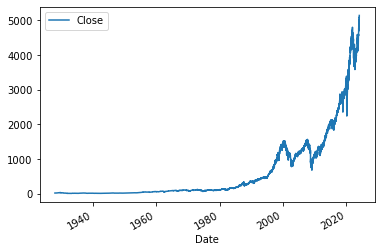

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [57]:
#del sp500["Dividends"]
#del sp500["Stock Splits"]
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000
2024-02-28 00:00:00-05:00,5067.200195,5077.370117,5058.350098,5069.759766,3789370000


In [58]:
# You care more about value increasing or decreasing rather than absolute value
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [59]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [60]:
# Important that data is not too far back in date
sp500 = sp500.loc["1990-01-01":].copy()

In [61]:
# Random forest can overfit but not as much, can also pick up non-linear relationships
rf = RandomForestClassifier

# Experiment with values for overfitting
model = rf(n_estimators=100, min_samples_split=100, random_state=1)

# Spliting up data
train = sp500.iloc[:-100] # You dont want to feed future data
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [62]:
preds = model.predict(test[predictors])

In [63]:
preds = pd.Series(preds, index=test.index)

In [64]:
precision_score(test["Target"],preds)

0.5172413793103449

In [65]:
# Treat each predictor as a column
combined = pd.concat([test["Target"], preds], axis=1) 

<AxesSubplot:xlabel='Date'>

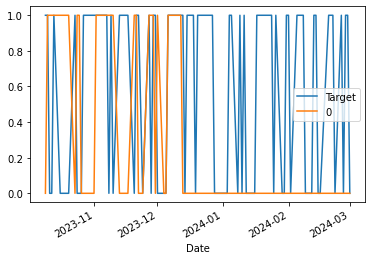

In [66]:
combined.plot()

## ADDING BACKTESTING

In [67]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [68]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [69]:
predictions = backtest(sp500, model, predictors)

In [70]:
predictions["Predictions"].value_counts()

0    3511
1    2596
Name: Predictions, dtype: int64

In [71]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [72]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.53496
0    0.46504
Name: Target, dtype: float64

## ADDING ADDITIONAL PARAMETERS

In [73]:
# Mean close price in the last 2, 5, 60, 250, 1000 days
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [75]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [76]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23 00:00:00-05:00,5100.919922,5111.060059,5081.459961,5088.799805,3672790000,5069.529785,0,1.000174,2.0,1.012144,3.0,1.059453,38.0,1.153423,141.0,1.262368,532.0
2024-02-26 00:00:00-05:00,5093.000000,5097.660156,5068.910156,5069.529785,3683930000,5078.180176,1,0.998103,1.0,1.005753,3.0,1.053559,37.0,1.147924,140.0,1.256950,532.0
2024-02-27 00:00:00-05:00,5074.600098,5080.689941,5057.290039,5078.180176,3925950000,5069.759766,0,1.000852,1.0,1.003381,4.0,1.053432,38.0,1.148730,141.0,1.258437,533.0


In [77]:
model = rf(n_estimators=200, min_samples_split=50,random_state=1)

In [78]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # Returns the probablity that the stock price will be low (0) or high (1)
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [79]:
predictions = backtest(sp500, model, new_predictors)

In [80]:
predictions["Predictions"].value_counts()

0.0    4274
1.0     832
Name: Predictions, dtype: int64

In [82]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077

In [83]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.544849
0    0.455151
Name: Target, dtype: float64

In [84]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-02-23 00:00:00-05:00,0,0.0
2024-02-26 00:00:00-05:00,1,0.0
2024-02-27 00:00:00-05:00,0,0.0
